# Analise dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt

In [2]:
df = pd.read_csv('artigo_ia.csv', sep=',')

In [3]:
df.head()

,id,framework,html,sample,title,state,created_at,body,labels
0,4,Android,https://github.com/googlesamples/io2014-codela...,googlesamples/io2014-codelabs,The main README file is not about Google I/O n...,closed,2014-07-12 00:11:32,I'm not sure what kind of information we shoul...,bug
1,58,Android,https://github.com/googlesamples/google-servic...,googlesamples/google-services,Android Google Sign-in: When Google account po...,open,2019-11-14 11:45:20,### Step 1: Are you in the right place?\n\n *...,bug
2,65,Android,https://github.com/googlesamples/google-servic...,googlesamples/google-services,Cancelling google sign in on ios gives wrong e...,closed,2019-10-02 09:40:13,### Describe your environment\n\n * Device: i...,bug
3,111,Android,https://github.com/googlesamples/google-servic...,googlesamples/google-services,Canceling a Sign in leads to GoogleSignInStatu...,closed,2018-07-16 13:53:20,### Step 1: Are you in the right place?\n\nA b...,bug
4,135,Android,https://github.com/googlesamples/google-servic...,googlesamples/google-services,SignIn Dialog from GoogleSignInClient.getSignI...,open,2017-12-14 18:35:01,When running the sample for SignInClient every...,bug


### Exporar o número de artigos para cada categoria

bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("labels"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Número de perguntas por categoria')),
    tooltip=[alt.Tooltip('count()', title='Número de perguntas'), 'labels'],
    color='labels'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Número de perguntas por categoria",
)

### O tamanho das perguntas

In [4]:
df['Body_length'] = df['body'].str.len()

c:\users\sabia\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


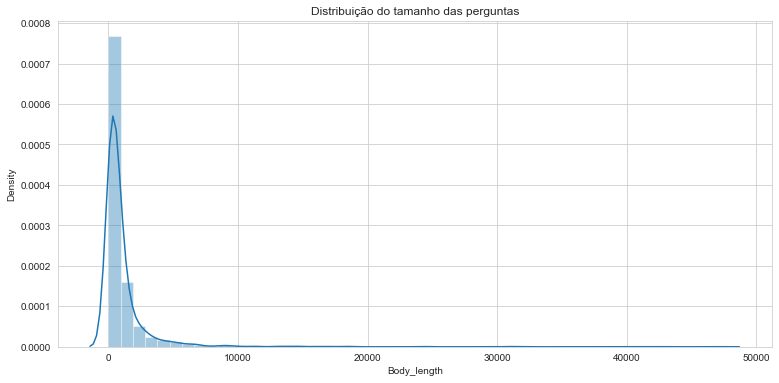

In [5]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['Body_length']).set_title('Distribuição do tamanho das perguntas');

In [6]:
df['Body_length'].describe()

count     2917.000000
mean      1068.987316
std       2332.767690
min         10.000000
25%        223.000000
50%        462.000000
75%       1046.000000
max      47262.000000
Name: Body_length, dtype: float64

Salvar o conjunto de dados no formato pickle

In [7]:
with open('StackOverflow_dataset.pickle', 'wb') as output:
    pickle.dump(df, output)